In [1]:
import pandas as pd
import transformers
import datasets

import shap

/home/arnpo/TAED2-TENCFIM/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load data

In [2]:
data = pd.read_parquet("../data/processed/train.parquet")

Load model

In [3]:
tokenizer = transformers.AutoTokenizer.from_pretrained("../models/roberta-emotions-v2.5")
model = transformers.AutoModelForSequenceClassification.from_pretrained("../models/roberta-emotions-v2.5")


pred =  transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
)

Device set to use cpu
/home/arnpo/TAED2-TENCFIM/.venv/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Create an explainer for the pipeline

In [4]:
explainer = shap.Explainer(pred)

Compute shap values

In [5]:
shap_values = explainer(data['text'][:30])

PartitionExplainer explainer: 31it [12:18, 24.61s/it]                        


Visualize the impact on all the output classes

In [6]:
# shap.plots.text(shap_values)

Visualize impact on a single class

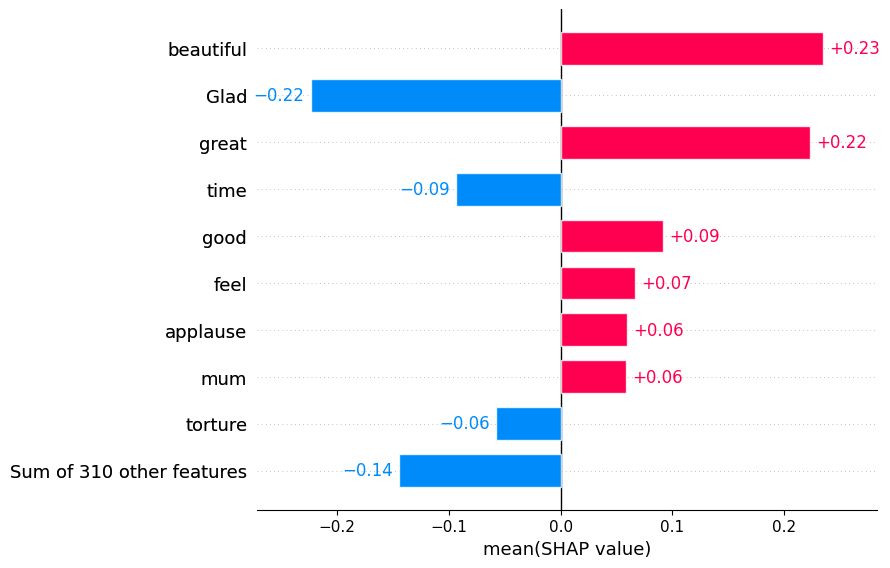

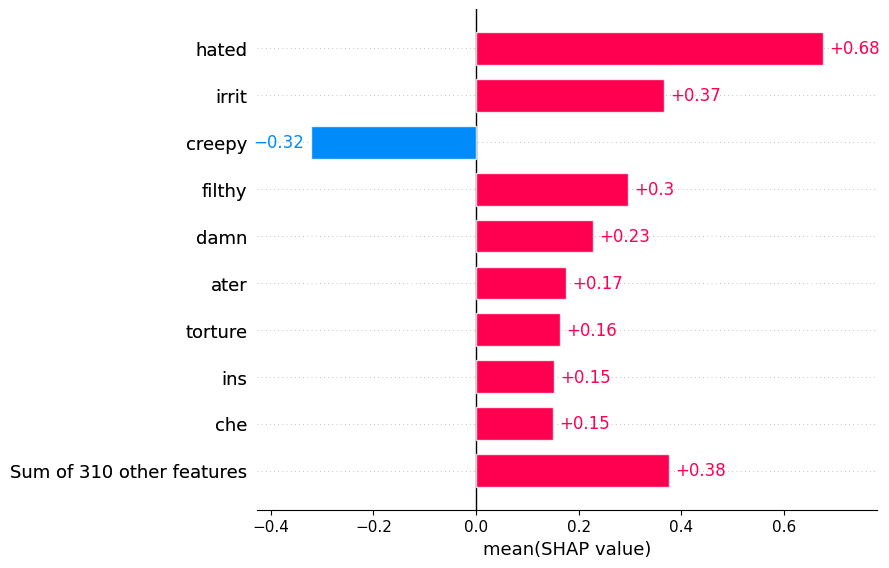

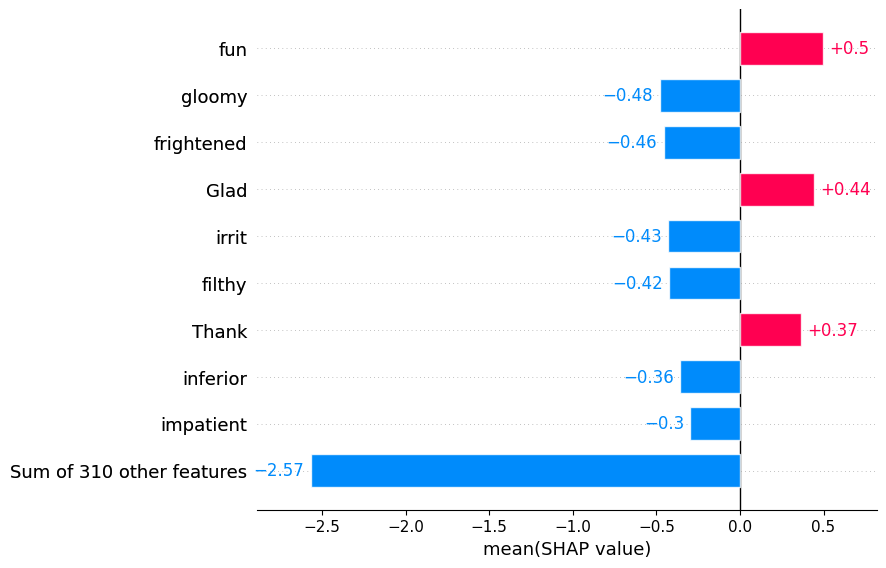

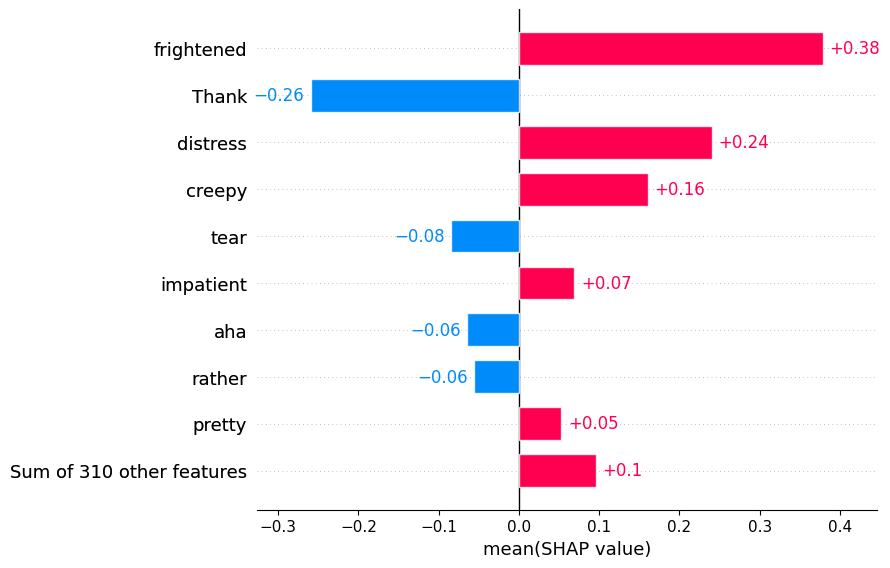

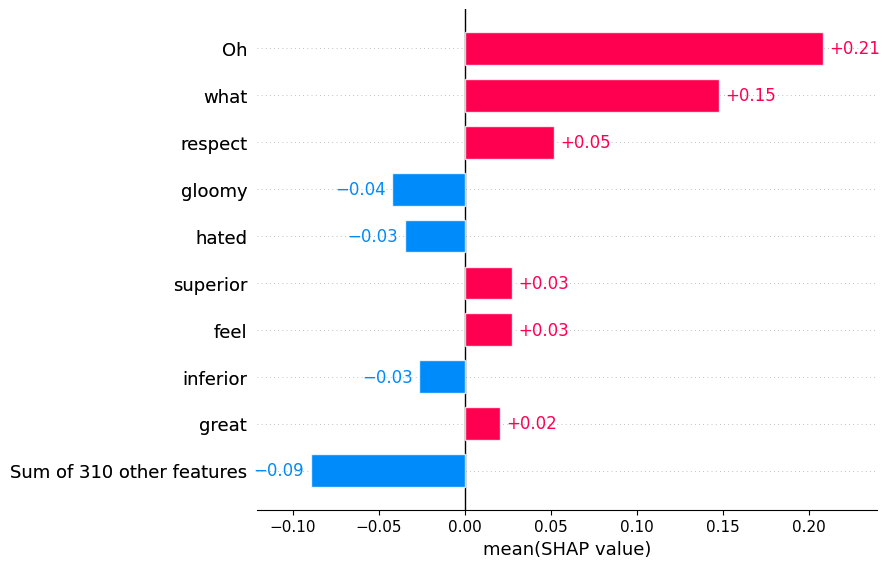

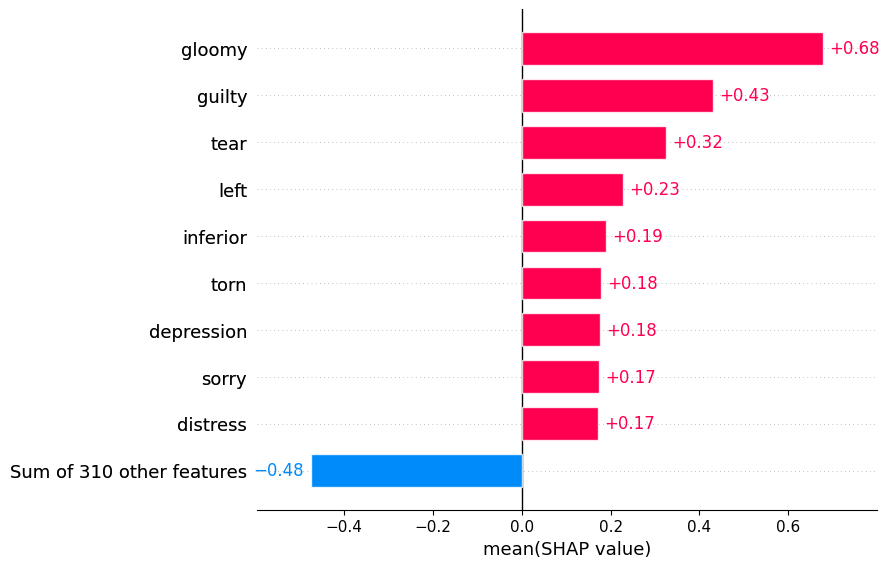

In [7]:
shap.plots.bar(shap_values[:, :, "Love"].mean(0))
shap.plots.bar(shap_values[:, :, "Anger"].mean(0))
shap.plots.bar(shap_values[:, :, "Happiness"].mean(0))
shap.plots.bar(shap_values[:, :, "Fear"].mean(0))
shap.plots.bar(shap_values[:, :, "Surprise"].mean(0))
shap.plots.bar(shap_values[:, :, "Sadness"].mean(0))